In [1]:
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

# EVT fits using tensorflow for autodiff

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
x = tf.Variable(3.0)

with tf.GradientTape() as tape:
    y = x**2

In [4]:
# dy = 2x * dx
dy_dx = tape.gradient(y, x)
dy_dx.numpy()

6.0

In [5]:
w = tf.Variable(tf.random.normal((3, 2)), name="w")
b = tf.Variable(tf.zeros(2, dtype=tf.float32), name="b")
x = [[1.0, 2.0, 3.0]]

with tf.GradientTape(persistent=True) as tape:
    y = x @ w + b
    loss = tf.reduce_mean(y**2)

In [6]:
[dl_dw, dl_db] = tape.gradient(loss, [w, b])

In [9]:
dl_dw, dl_db


(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.09011936, 10.3813715 ],
        [-0.18023872, 20.762743  ],
        [-0.2703581 , 31.144115  ]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([-0.09011936, 10.3813715 ], dtype=float32)>)

In [8]:
my_vars = {"w": w, "b": b}

grad = tape.gradient(loss, my_vars)
grad["b"]

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-0.09011936, 10.3813715 ], dtype=float32)>

In [10]:
layer = tf.keras.layers.Dense(2, activation="relu")
x = tf.constant([[1.0, 2.0, 3.0]])

with tf.GradientTape() as tape:
    # Forward pass
    y = layer(x)
    loss = tf.reduce_mean(y**2)

# Calculate gradients with respect to every trainable variable
grad = tape.gradient(loss, layer.trainable_variables)

In [11]:
for var, g in zip(layer.trainable_variables, grad):
    print(f"{var.name}, shape: {g.shape}")

dense/kernel:0, shape: (3, 2)
dense/bias:0, shape: (2,)


In [12]:
# A trainable variable
x0 = tf.Variable(3.0, name="x0")
# Not trainable
x1 = tf.Variable(3.0, name="x1", trainable=False)
# Not a Variable: A variable + tensor returns a tensor.
x2 = tf.Variable(2.0, name="x2") + 1.0
# Not a variable
x3 = tf.constant(3.0, name="x3")

with tf.GradientTape() as tape:
    y = (x0**2) + (x1**2) + (x2**2)

grad = tape.gradient(y, [x0, x1, x2, x3])

for g in grad:
    print(g)

tf.Tensor(6.0, shape=(), dtype=float32)
None
None
None


In [13]:
x = tf.constant(3.0)
with tf.GradientTape() as tape:
    tape.watch(x)
    y = x**2

# dy = 2x * dx
dy_dx = tape.gradient(y, x)
print(dy_dx.numpy())

6.0


In [14]:
x0 = tf.Variable(0.0)
x1 = tf.Variable(10.0)

with tf.GradientTape(watch_accessed_variables=False) as tape:
    tape.watch(x1)
    y0 = tf.math.sin(x0)
    y1 = tf.nn.softplus(x1)
    y = y0 + y1
    ys = tf.reduce_sum(y)

In [15]:
# dys/dx1 = exp(x1) / (1 + exp(x1)) = sigmoid(x1)
grad = tape.gradient(ys, {"x0": x0, "x1": x1})

print("dy/dx0:", grad["x0"])
print("dy/dx1:", grad["x1"].numpy())

dy/dx0: None
dy/dx1: 0.9999546


In [16]:
x = tf.constant(3.0)

with tf.GradientTape() as tape:
    tape.watch(x)
    y = x * x
    z = y * y

# Use the tape to compute the gradient of z with respect to the
# intermediate value y.
# dz_dy = 2 * y and y = x ** 2 = 9
print(tape.gradient(z, y).numpy())

18.0


In [17]:
x = tf.constant([1, 3.0])
with tf.GradientTape(persistent=True) as tape:
    tape.watch(x)
    y = x * x
    z = y * y

print(tape.gradient(z, x).numpy())  # [4.0, 108.0] (4 * x**3 at x = [1.0, 3.0])
print(tape.gradient(y, x).numpy())  # [2.0, 6.0] (2 * x at x = [1.0, 3.0])

[  4. 108.]
[2. 6.]


In [18]:
import tensorflow as tf
import numpy as np

# Generate some synthetic data (e.g., from a normal distribution)
true_mean = 2.0
true_stddev = 1.0
data = np.random.normal(true_mean, true_stddev, size=1000)

# Define the parameters of the model
mean = tf.Variable(0.0, dtype=tf.float32)
stddev = tf.Variable(1.0, dtype=tf.float32)


# Define the log likelihood function
def log_likelihood(mean, stddev, data):
    dist = tf.compat.v1.distributions.Normal(loc=mean, scale=stddev)
    log_likelihoods = dist.log_prob(data)
    return tf.reduce_sum(log_likelihoods)


# Define the loss function (negative log likelihood)
def neg_log_likelihood():
    return -log_likelihood(mean, stddev, data)


# Set up the optimizer
optimizer = tf.optimizers.Adam(learning_rate=0.01)


# Define the training step
@tf.function
def train_step():
    with tf.GradientTape() as tape:
        loss = neg_log_likelihood()
    gradients = tape.gradient(loss, [mean, stddev])
    optimizer.apply_gradients(zip(gradients, [mean, stddev]))
    return loss


# Training loop
for step in range(1000):
    loss = train_step()
    if step % 100 == 0:
        print(
            f"Step {step}, Loss: {loss.numpy()}, Mean: {mean.numpy()}, Stddev: {stddev.numpy()}"
        )

print(f"Estimated Mean: {mean.numpy()}, Estimated Stddev: {stddev.numpy()}")

Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


Step 0, Loss: 3373.111328125, Mean: 0.009999933652579784, Stddev: 1.0099999904632568
Step 100, Loss: 1882.8646240234375, Mean: 0.7618048191070557, Stddev: 1.5001142024993896
Step 200, Loss: 1656.1044921875, Mean: 1.2704793214797974, Stddev: 1.4409856796264648
Step 300, Loss: 1498.5015869140625, Mean: 1.6771808862686157, Stddev: 1.2032581567764282
Step 400, Loss: 1448.788818359375, Mean: 1.9070074558258057, Stddev: 1.0438764095306396
Step 500, Loss: 1447.109130859375, Mean: 1.9574655294418335, Stddev: 1.0286296606063843
Step 600, Loss: 1447.097900390625, Mean: 1.9620147943496704, Stddev: 1.0285587310791016
Step 700, Loss: 1447.097900390625, Mean: 1.96224045753479, Stddev: 1.0285587310791016
Step 800, Loss: 1447.097900390625, Mean: 1.962245225906372, Stddev: 1.0285587310791016
Step 900, Loss: 1447.097900390625, Mean: 1.962245225906372, Stddev: 1.0285587310791016
Estimated Mean: 1.962245225906372, Estimated Stddev: 1.0285587310791016


In [19]:
import tensorflow as tf
import tensorflow_probability as tfp
import numpy as np

# Use the TensorFlow Probability package
tfd = tfp.distributions

# Generate some synthetic data (for demonstration purposes, using a GEV distribution)
true_loc = 0.0
true_scale = 1.0
true_concentration = 0.1  # Shape parameter, also known as xi

gev = tfd.GeneralizedExtremeValue(
    loc=true_loc, scale=true_scale, concentration=true_concentration
)
data = gev.sample(1000).numpy()

# Define the parameters of the model
loc = tf.Variable(0.0, dtype=tf.float32)
scale = tf.Variable(1.0, dtype=tf.float32)
concentration = tf.Variable(0.0, dtype=tf.float32)  # Start with zero for stability


# Define the log likelihood function
def log_likelihood(loc, scale, concentration, data):
    dist = tfd.GeneralizedExtremeValue(
        loc=loc, scale=scale, concentration=concentration
    )
    log_likelihoods = dist.log_prob(data)
    return tf.reduce_sum(log_likelihoods)


# Define the loss function (negative log likelihood)
def neg_log_likelihood():
    return -log_likelihood(loc, scale, concentration, data)


# Set up the optimizer
optimizer = tf.optimizers.Adam(learning_rate=0.01)


# Define the training step
@tf.function
def train_step():
    with tf.GradientTape() as tape:
        loss = neg_log_likelihood()
    gradients = tape.gradient(loss, [loc, scale, concentration])
    optimizer.apply_gradients(zip(gradients, [loc, scale, concentration]))
    return loss


# Training loop
for step in range(2000):
    loss = train_step()
    if step % 100 == 0:
        print(
            f"Step {step}, Loss: {loss.numpy()}, Loc: {loc.numpy()}, Scale: {scale.numpy()}, Concentration: {concentration.numpy()}"
        )

print(
    f"Estimated Loc: {loc.numpy()}, Estimated Scale: {scale.numpy()}, Estimated Concentration: {concentration.numpy()}"
)

Step 0, Loss: inf, Loc: 0.00999993272125721, Scale: 0.9900000691413879, Concentration: -0.009999931789934635
Step 100, Loss: 1620.2271728515625, Loc: -0.026037784293293953, Scale: 0.9806874394416809, Concentration: 0.10872902721166611
Step 200, Loss: 1620.2271728515625, Loc: -0.025770466774702072, Scale: 0.9806209802627563, Concentration: 0.1084568127989769
Step 300, Loss: 1620.227294921875, Loc: -0.025771239772439003, Scale: 0.9806195497512817, Concentration: 0.1084568127989769
Step 400, Loss: 1620.227294921875, Loc: -0.02577112428843975, Scale: 0.9806195497512817, Concentration: 0.10845671594142914
Step 500, Loss: 1620.227294921875, Loc: -0.025771521031856537, Scale: 0.9806194305419922, Concentration: 0.1084570363163948
Step 600, Loss: 1620.227294921875, Loc: -0.025771308690309525, Scale: 0.9806194305419922, Concentration: 0.10845670849084854
Step 700, Loss: 1620.2271728515625, Loc: -0.025771496817469597, Scale: 0.9806194305419922, Concentration: 0.10845702886581421
Step 800, Loss: 1

(array([0.02123572, 0.06724644, 0.16634646, 0.30791792, 0.27606432,
        0.4176358 , 0.34331079, 0.35392865, 0.29376075, 0.23359296,
        0.19820004, 0.1840429 , 0.15572854, 0.06724647, 0.09202141,
        0.08494291, 0.05308927, 0.04601074, 0.01769642, 0.02123573,
        0.04247146, 0.01769641, 0.01415715, 0.01061786, 0.00353929,
        0.01769641, 0.00353929, 0.00353929, 0.        , 0.        ,
        0.00353929, 0.01061786, 0.00353928, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00353928,
        0.        , 0.        , 0.        , 0.        , 0.00353928]),
 array([-1.76652193, -1.48397911, -1.20143628, -0.91889346, -0.63635063,
        -0.35380778, -0.07126495,  0.21127787,  0.4938207 ,  0.77636355,
         1.05890632,  1.34144914,  1.62399197,  1.90653491,  2.18907762,
         2.47162056,  2.75416327,  3.03670621,  3.31924891,  3.60179186,
         3.88433456,  4.16

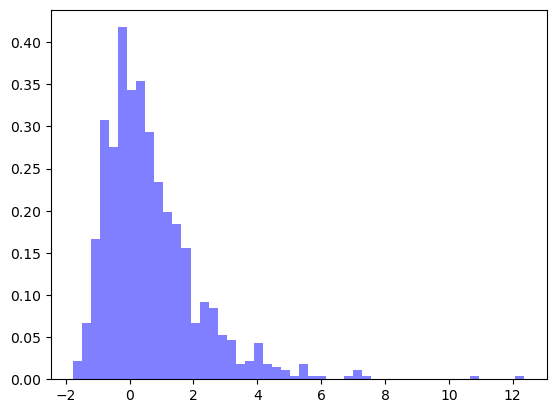

In [20]:
plt.hist(data, bins=50, density=True, alpha=0.5, color="blue")

In [21]:
# Use the TensorFlow Probability package
tfd = tfp.distributions

# Generate some synthetic data (for demonstration purposes, using a GEV distribution)
true_loc = 0.0
true_scale = 1.0
true_concentration = 0.5  # Shape parameter, also known as xi
true_z_star = true_loc * true_scale 